In [11]:
import torch
import matplotlib.pyplot as plt
from transformers import pipeline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from tools import DatasetProvider, EvaluateTools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# evaluate the deepset model with the given test data
model_name = "deepset/bert-base-german-cased-hatespeech-GermEval18Coarse"

def evaluate_deepset_model(X_test, y_test):
    classifier = pipeline("text-classification", model=model_name, device=0 if torch.cuda.is_available() else -1)
    predictions = classifier(X_test, truncation=True, max_length=512)
    
    # Convert predictions to binary labels
    predicted_labels = [0 if p['label'] == 'LABEL_0' else 1 for p in predictions]
    
    return EvaluateTools.calc_metrics(y_test, predicted_labels)

# Evaluate deepsets model on GermEval18

In [13]:
dataset_name="philschmid/germeval18"
dataset_germeval = DatasetProvider.get_germ_eval_18(dataset_name)
DatasetProvider.stats(dataset_germeval)

Sample Data:
{'text': '@corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?', 'label': 0}

Data Length:
8407
Number of labels with 1: 2838
Number of labels with 0: 5569


In [14]:
X_train, X_test, y_train, y_test = DatasetProvider.split_data(dataset_germeval)

Training samples: 6725, Test samples: 1682


In [15]:
evaluation_results = evaluate_deepset_model(X_test, y_test)

Model Evaluation Metrics:
Accuracy: 0.3377
Precision: 0.3377
Recall: 1.0000
F1 Score: 0.5049


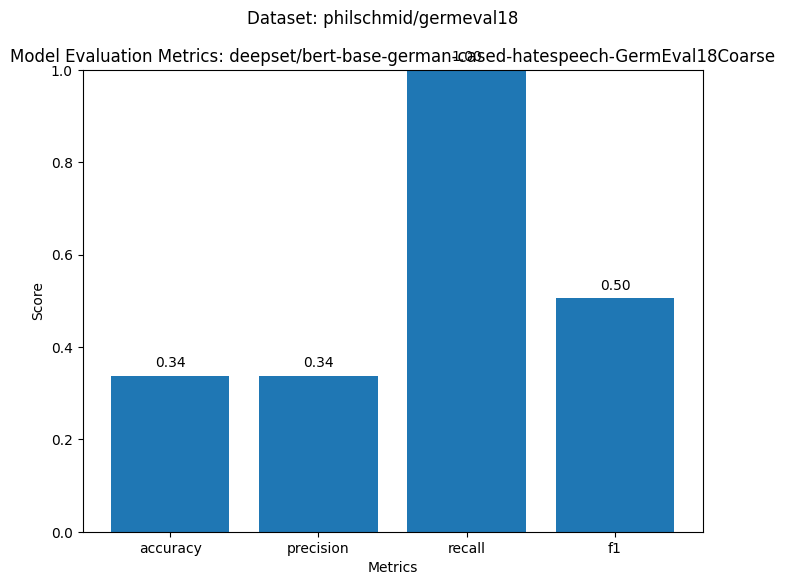

In [16]:
EvaluateTools.plot_metrics(evaluation_results, model_name, dataset_name)

# Evaluate deepsets model on german hate speech superset

In [17]:
dataset_name = "manueltonneau/german-hate-speech-superset"
dataset_superset = DatasetProvider.get_superset(dataset_name)
DatasetProvider.stats(dataset_superset)

Sample Data:
{'text': 'gleich an die wand stellen und erschiessen..', 'label': 1.0}

Data Length:
58024
Number of labels with 1: 6297
Number of labels with 0: 44246


In [18]:
X_train, X_test, y_train, y_test = DatasetProvider.split_data(dataset_superset)

Training samples: 40434, Test samples: 10109


In [19]:
evaluation_results = evaluate_deepset_model(X_test, y_test)

Model Evaluation Metrics:
Accuracy: 0.1245
Precision: 0.1245
Recall: 1.0000
F1 Score: 0.2215


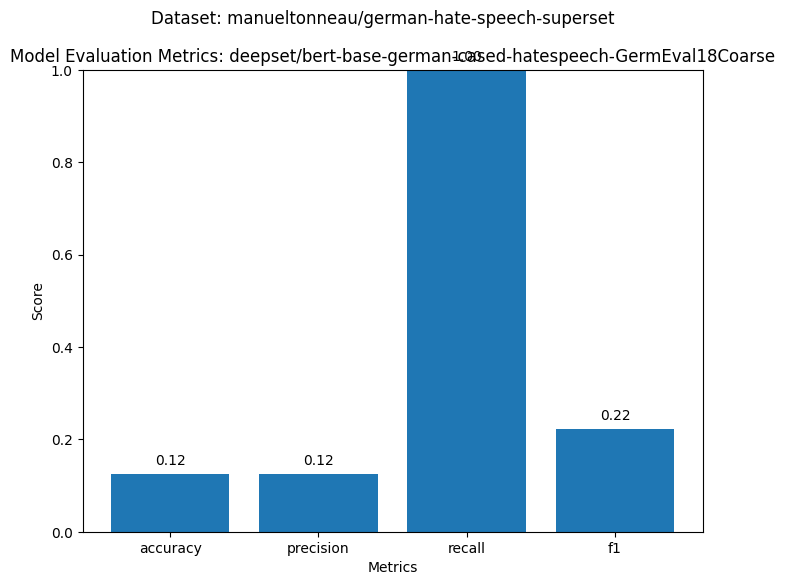

In [20]:
EvaluateTools.plot_metrics(evaluation_results, model_name, dataset_name)